In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt

In [2]:
ss =pd.read_csv("~/Downloads/social_service.csv")

In [3]:
ss

,org_name,pvt_support_thisYear,category,data_year,pub_year
0,American Red Cross,734635592,Social Service,2014,2015
1,Catholic Charities USA,748969712,Social Service,2014,2015
2,Christian Appalachian Project,76968127,Social Service,2014,2015
3,City Year,66284623,Social Service,2014,2015
4,Disabled American Veterans,114661280,Social Service,2014,2015
5,Feeding America,2016270036,Social Service,2014,2015
6,Good360,309216742,Social Service,2014,2015
7,Goodwill Industries International,926568371,Social Service,2014,2015
8,Habitat for Humanity International,665000000,Social Service,2014,2015
9,Lutheran Services in America,722642501,Social Service,2014,2015


In [4]:
pvt_support = pd.pivot_table(ss, values = [sum, "pvt_support_thisYear"], columns = ["data_year","pub_year"], aggfunc = np.sum)

In [5]:
type(pvt_support)

pandas.core.series.Series

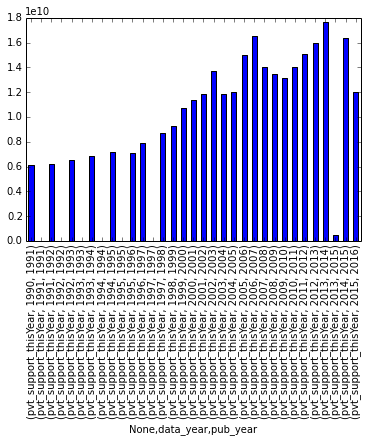

In [6]:
%matplotlib inline


pvt_support.plot.bar(x ="data_year", y = "pvt_support_thisYear")

In [7]:
ss_adj = pd.read_csv("~/Downloads/ss_adjusted.csv")

In [8]:
ss_adj

,2015_dollars,data_year
0,11066947806,1990
1,10808774500,1991
2,11084845221,1992
3,11252072070,1993
4,11451059521,1994
5,11104641782,1995
6,11963394551,1996
7,12884510708,1997
8,13478928630,1998
9,15299604629,1999


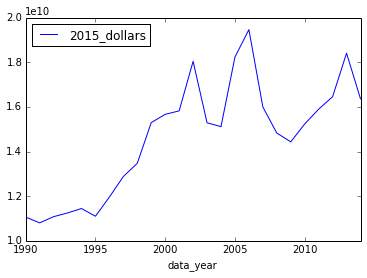

In [9]:
ss_adj.plot.line(x="data_year", y= "2015_dollars" )

In [10]:
ss_adj.var()

2015_dollars    6.732549e+18
data_year       5.416667e+01
dtype: float64

In [11]:
# Count of social groups in the 400 list in each pub_year
ss_count =pd.read_csv("~/Downloads/ss_groups_count.csv")

In [12]:
ss_count = ss_count.sort("year", ascending = 1)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


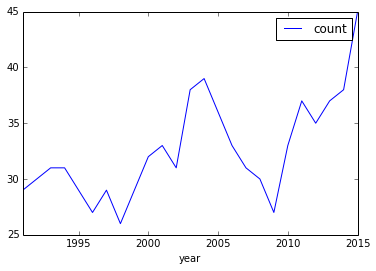

In [13]:
#There was a high point in 2003-2005 and then an inflection point at 2008-2009 with the number of groups rising steadily since the recession.
ss_count.plot.line(x="year", y="count")

In [14]:
ss_count[(ss_count["year"] >= 2010)]

,year,count
5,2010,33
4,2011,37
3,2012,35
2,2013,37
1,2014,38
0,2015,45


In [15]:
#IMPORTANT!
# total raised each year by the 15 mostly cash social service groups that appeared on the list each of the last ten years. 

total_raised = pd.read_csv("ss_total_raised.csv")

In [16]:
total_raised = total_raised.sort("pub_year", ascending =1)


/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [17]:
total_raised.columns

Index([u'raw_dollars', u'pub_year', u'2015_dollars'], dtype='object')

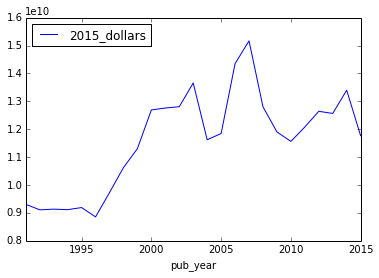

In [18]:
total_raised.plot(x = "pub_year", y = "2015_dollars")

In [19]:
total_raised

,raw_dollars,pub_year,2015_dollars
24,5134459437,1991,9310828743
23,5237189760,1992,9113757620
22,5408694754,1993,9137448917
21,5559885760,1994,9119880612
20,5749098140,1995,9194532655
19,5697523222,1996,8860788115
18,6443420128,1997,9733430445
17,7196444807,1998,10626990046
16,7776917728,1999,11308416068
15,8922708670,2000,12694337625


In [20]:
#import all of the individual records for each year

pd.read_csv("ss_cash_groups.csv")

,org_id,org_name,pvt_support_thisYear,pub_year,count_thisYear,2015_dollars
0,cop44,American Red Cross,734635592,2015,15,735517155
1,cop42,Catholic Charities USA,748969712,2015,15,749868476
2,cop1164,Disabled American Veterans,114661280,2015,15,114798874
3,cop47,Goodwill Industries International,926568371,2015,15,927680253
4,cop52,Habitat for Humanity International,665000000,2015,15,665798000
5,cop55,Lutheran Services in America,722642501,2015,15,723509672
6,cop432,Paralyzed Veterans of America,101739309,2015,15,101861396
7,cop226,Robin Hood Foundation,176957636,2015,15,177169985
8,cop202,Special Olympics,230765777,2015,15,231042696
9,cop266,The Arc,148574506,2015,15,148752795


In [21]:
ss_cash_groups = pd.read_csv("ss_cash_groups.csv")

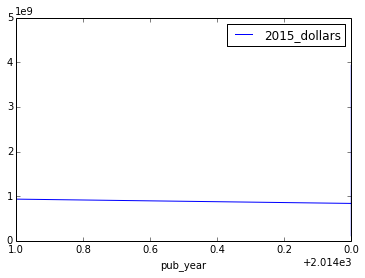

In [22]:
ss_cash_groups[(ss_cash_groups["pub_year"]>= 2006)].plot.line(x = "pub_year", y = "2015_dollars")

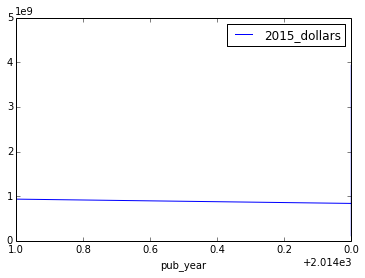

In [23]:
plt.figure();
ss_cash_groups[(ss_cash_groups["pub_year"]>= 2006)][["org_name", "pub_year", "2015_dollars" ]].plot( x= "pub_year", y = "2015_dollars")

In [24]:
ss_cash_groups['pub_year'] = ss_cash_groups['pub_year'].astype(np.str)

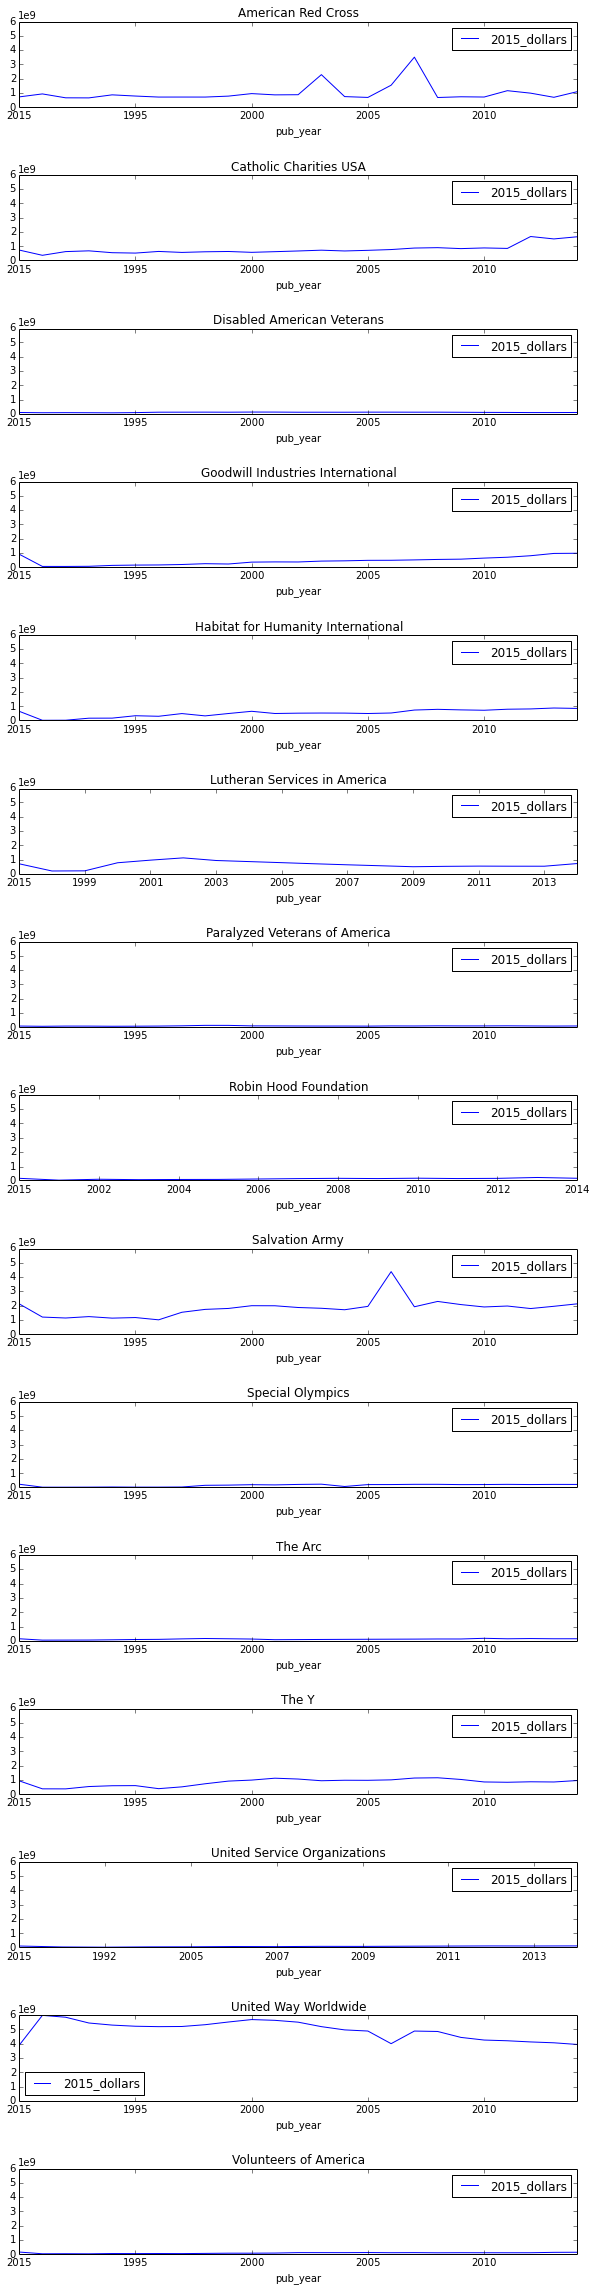

In [25]:
fig, axes = plt.subplots(nrows=15, ncols=1, figsize=(10, 40))
rowCt = 0
dfmax = ss_cash_groups['2015_dollars'].max()
dfmin = ss_cash_groups['2015_dollars'].min()
for x in ss_cash_groups.groupby("org_name"):
    x[1][['pub_year', '2015_dollars']].set_index('pub_year').plot(ax=axes[rowCt])
    axes[rowCt].set_title(x[0])
    
    axes[rowCt].set_ylim([dfmin, dfmax])
    rowCt += 1

plt.subplots_adjust(wspace=.3, hspace=.8)

In [26]:
t50_cash = pd.read_csv("t50_cash_ss.csv")

In [27]:
t50_cash

,org_name,pvt_support_thisYear,inflation_adjustment,2015_dollars_thisYear,rank_thisYear,data_year,pub_year
0,Habitat for Humanity International,675000000,1.0000,6.750000e+08,NaN,2015,2016
1,Catholic Charities USA,2010204939,1.0000,2.010205e+09,NaN,2015,2016
2,American Red Cross,613845159,1.0000,6.138452e+08,NaN,2015,2016
3,Salvation Army,1904496000,1.0000,1.904496e+09,NaN,2015,2016
4,Lutheran Services in America,722642501,1.0000,7.226425e+08,NaN,2015,2016
5,United Way Worldwide,3872917029,1.0012,3.877565e+09,1.0,2014,2015
6,Salvation Army,2115646000,1.0012,2.118185e+09,3.0,2014,2015
7,The Y,934231000,1.0012,9.353521e+08,13.0,2014,2015
8,Goodwill Industries International,926568371,1.0012,9.276803e+08,15.0,2014,2015
9,Catholic Charities USA,748969712,1.0012,7.498685e+08,20.0,2014,2015


In [28]:
t50_cash.rename = ({"2015_dollars_thisYear":"2015_dollars"})

In [29]:
t50_cash["2015_dollars_thisYear"].name = "2015_dollars"

In [30]:
t50_cash.columns

Index([u'org_name', u'pvt_support_thisYear', u'inflation_adjustment',
       u'2015_dollars_thisYear', u'rank_thisYear', u'data_year', u'pub_year'],
      dtype='object')

In [31]:
t50_cash = t50_cash.sort(columns = "pub_year", ascending = True)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


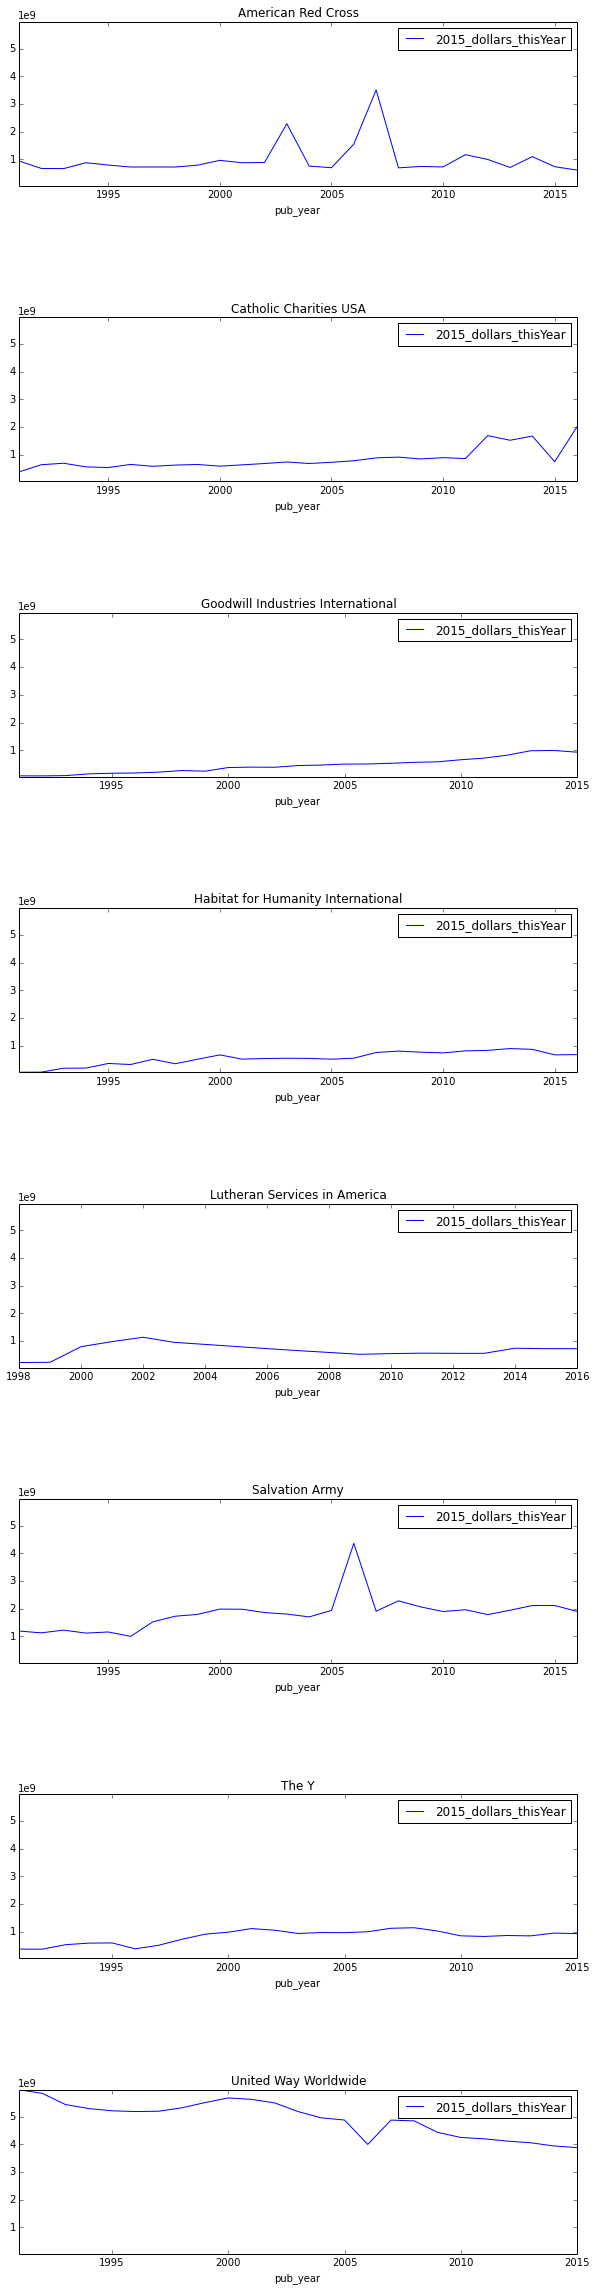

In [48]:
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40))
rowCt = 0
dfmax = t50_cash['2015_dollars_thisYear'].max()
dfmin = t50_cash['2015_dollars_thisYear'].min()
for x in t50_cash.groupby("org_name"):
    x[1][['pub_year', '2015_dollars_thisYear']].set_index('pub_year').plot(ax=axes[rowCt])
    axes[rowCt].set_title(x[0])
    
    axes[rowCt].set_ylim([dfmin, dfmax])
    rowCt += 1

plt.subplots_adjust(wspace=.3, hspace=.8)

In [34]:
#What does 5/6 year trend look like?
t50_sixYears= t50_cash[t50_cash["pub_year"] >= 2012]

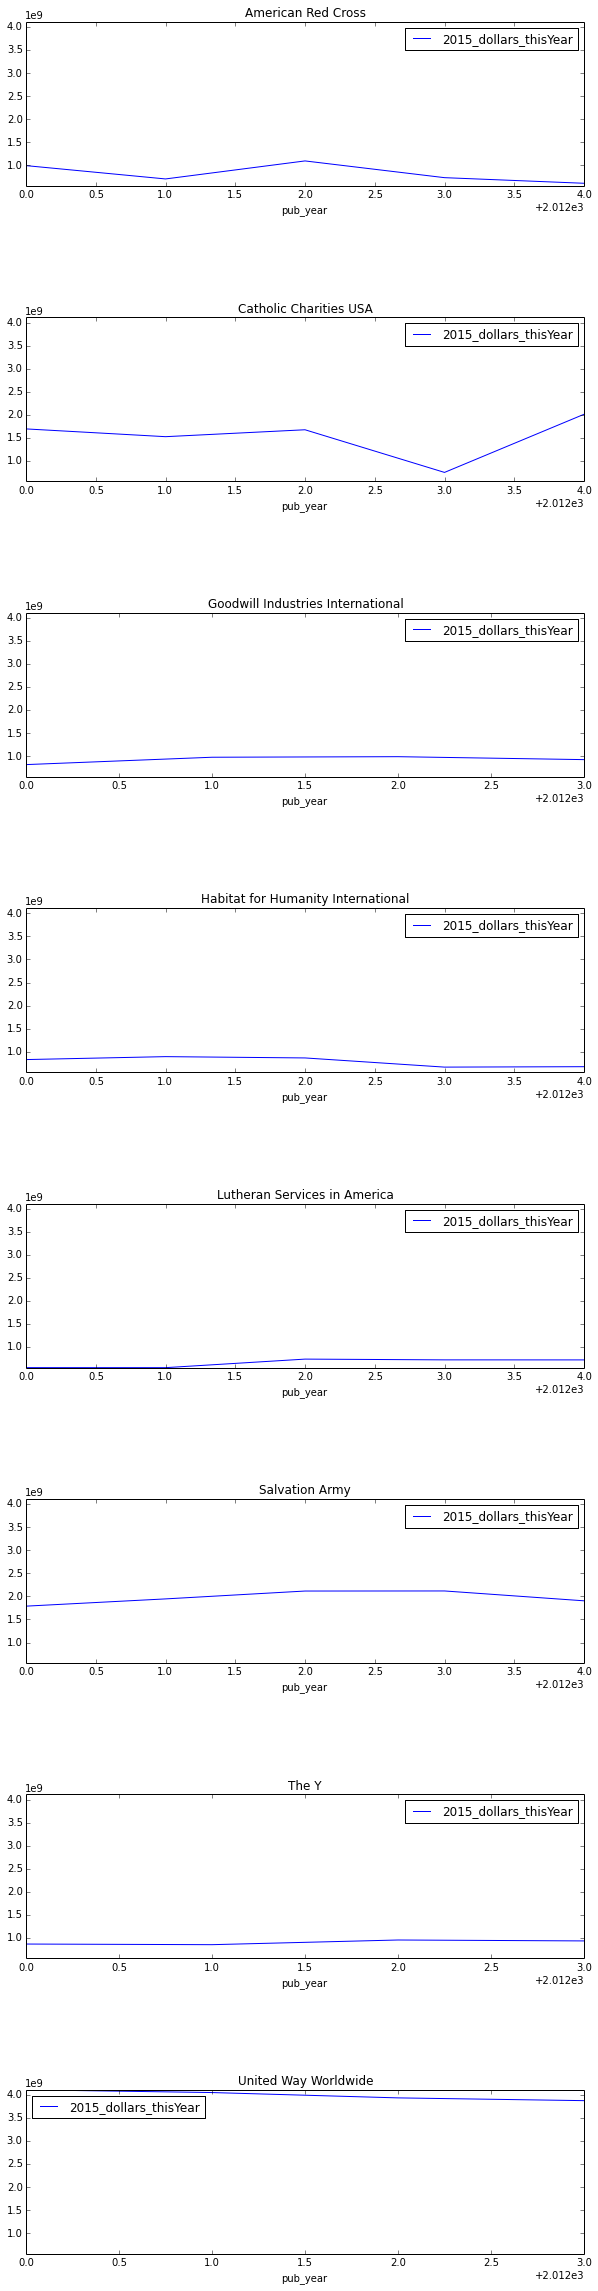

In [35]:
#trend in these groups over past ten years
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(10, 40))
rowCt = 0
dfmax = t50_sixYears['2015_dollars_thisYear'].max()
dfmin = t50_sixYears['2015_dollars_thisYear'].min()
for x in t50_sixYears.groupby("org_name"):
    x[1][['pub_year', '2015_dollars_thisYear']].set_index('pub_year').plot(ax=axes[rowCt])
    axes[rowCt].set_title(x[0])
    
    axes[rowCt].set_ylim([dfmin, dfmax])
    rowCt += 1

plt.subplots_adjust(wspace=.3, hspace=.8)